In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import seaborn as sns

rmses=[]

In [190]:
data_test = pd.read_csv('test.csv').set_index('Id')
data_train = pd.read_csv('train.csv').set_index('Id')
data = pd.concat([data_train, data_test])

print(f'The number of NaN in data_train.SalePrice is {data_train.SalePrice.isna().sum()}')

data.head()

The number of NaN in data_train.SalePrice is 0


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [191]:
[x for x in zip(data_train.columns,data_train.dtypes, data.dtypes) if x[1]!=x[2]]

[('BsmtFinSF1', dtype('int64'), dtype('float64')),
 ('BsmtFinSF2', dtype('int64'), dtype('float64')),
 ('BsmtUnfSF', dtype('int64'), dtype('float64')),
 ('TotalBsmtSF', dtype('int64'), dtype('float64')),
 ('BsmtFullBath', dtype('int64'), dtype('float64')),
 ('BsmtHalfBath', dtype('int64'), dtype('float64')),
 ('GarageCars', dtype('int64'), dtype('float64')),
 ('GarageArea', dtype('int64'), dtype('float64')),
 ('SalePrice', dtype('int64'), dtype('float64'))]

In [192]:
#examine data_description
file = open('data_description.txt', 'r')
text = file.read()
print(text)

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

### Feature engineering

- handle missing data
- convert important categorical features
- reduce the number of features (we only have about 1400 data points, cannot have too many features)

In [193]:
n_na=[]
for col in data.columns[:-1]:
    n_na.append((sum(data_train[col].isna()), sum(data_test[col].isna()), data[col].dtype))

n_Na = list(zip(data.columns, n_na))


In [194]:
corrs = [(col, abs(data_train.SalePrice.corr(data_train[col]))) for col in data_train.columns[:-1] if data_train[col].dtype in ['int64','float64','bool']]
corrs.sort(key= lambda x:x[1], reverse=True)

corrs = dict(corrs)
corrs

{'OverallQual': 0.7909816005838048,
 'GrLivArea': 0.7086244776126522,
 'GarageCars': 0.6404091972583531,
 'GarageArea': 0.6234314389183617,
 'TotalBsmtSF': 0.6135805515591956,
 '1stFlrSF': 0.6058521846919147,
 'FullBath': 0.5606637627484456,
 'TotRmsAbvGrd': 0.5337231555820284,
 'YearBuilt': 0.5228973328794969,
 'YearRemodAdd': 0.5071009671113864,
 'GarageYrBlt': 0.4863616774878608,
 'MasVnrArea': 0.477493047095716,
 'Fireplaces': 0.46692883675152763,
 'BsmtFinSF1': 0.38641980624215316,
 'LotFrontage': 0.3517990965706781,
 'WoodDeckSF': 0.3244134445681295,
 '2ndFlrSF': 0.3193338028320677,
 'OpenPorchSF': 0.31585622711605543,
 'HalfBath': 0.2841076755947829,
 'LotArea': 0.26384335387140573,
 'BsmtFullBath': 0.22712223313149404,
 'BsmtUnfSF': 0.21447910554696895,
 'BedroomAbvGr': 0.16821315430073996,
 'KitchenAbvGr': 0.1359073708421411,
 'EnclosedPorch': 0.1285779579259565,
 'ScreenPorch': 0.1114465711429111,
 'PoolArea': 0.09240354949187317,
 'MSSubClass': 0.08428413512659526,
 'Overall

In [195]:
display(n_Na)

[('MSSubClass', (0, 0, dtype('int64'))),
 ('MSZoning', (0, 4, dtype('O'))),
 ('LotFrontage', (259, 227, dtype('float64'))),
 ('LotArea', (0, 0, dtype('int64'))),
 ('Street', (0, 0, dtype('O'))),
 ('Alley', (1369, 1352, dtype('O'))),
 ('LotShape', (0, 0, dtype('O'))),
 ('LandContour', (0, 0, dtype('O'))),
 ('Utilities', (0, 2, dtype('O'))),
 ('LotConfig', (0, 0, dtype('O'))),
 ('LandSlope', (0, 0, dtype('O'))),
 ('Neighborhood', (0, 0, dtype('O'))),
 ('Condition1', (0, 0, dtype('O'))),
 ('Condition2', (0, 0, dtype('O'))),
 ('BldgType', (0, 0, dtype('O'))),
 ('HouseStyle', (0, 0, dtype('O'))),
 ('OverallQual', (0, 0, dtype('int64'))),
 ('OverallCond', (0, 0, dtype('int64'))),
 ('YearBuilt', (0, 0, dtype('int64'))),
 ('YearRemodAdd', (0, 0, dtype('int64'))),
 ('RoofStyle', (0, 0, dtype('O'))),
 ('RoofMatl', (0, 0, dtype('O'))),
 ('Exterior1st', (0, 1, dtype('O'))),
 ('Exterior2nd', (0, 1, dtype('O'))),
 ('MasVnrType', (8, 16, dtype('O'))),
 ('MasVnrArea', (8, 15, dtype('float64'))),
 ('Ex

In [196]:
# MSSubClass should be categorical, make dtype = str, so that can apply 
# pd.get_dummies later


data['MSSubClass'] = data['MSSubClass'].apply(str)

In [197]:
data['YrSold'] = data.YrSold.astype('str')

In [198]:
# exam the 1 missing value for 'electrical'
data.loc[data.Electrical.isna(), 'Electrical'] = data.Electrical.mode()

In [199]:
data.Electrical.value_counts()

SBrkr    2671
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64

In [200]:
# fill in missing 'LotFrontage' with the mode within house's neighborhood
def fillna_with_grouped_mode(col, groupby, data=data):
    """
    input: 
    col : column name to fill in NaN
    
    groupby: column name to groupby. 
    Modes are calculated within each group 
    and fill to the NaN value of that group.
    
    data = the dataframe contains col and groupby (default: data)
    """
    print(data[col].value_counts(dropna=False))

    for name, group in data[data[col].isna()].groupby(groupby):
        zone = data[data[groupby]==name][col].mode()[0]
        data.loc[group.index, col] = data.loc[group.index, col].fillna(zone)
    
    print('Filled NaN with nbhd mode:')
    print(data[col].value_counts(dropna=False))

In [201]:
fillna_with_grouped_mode('LotFrontage','Neighborhood', data)

NaN      486
60.0     276
80.0     137
70.0     133
50.0     117
        ... 
155.0      1
141.0      1
136.0      1
28.0       1
137.0      1
Name: LotFrontage, Length: 129, dtype: int64
Filled NaN with nbhd mode:
60.0     312
80.0     283
70.0     186
65.0     140
50.0     130
        ... 
144.0      1
119.0      1
182.0      1
195.0      1
141.0      1
Name: LotFrontage, Length: 128, dtype: int64


In [202]:
fillna_with_grouped_mode('MSZoning','Neighborhood', data)

RL         2265
RM          460
FV          139
RH           26
C (all)      25
NaN           4
Name: MSZoning, dtype: int64
Filled NaN with nbhd mode:
RL         2266
RM          463
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64


In [203]:
data['Alley'] = data.Alley.fillna('No')

In [204]:
data.Utilities.value_counts()

AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64

In [205]:
data = data.drop('Utilities', axis=1)

In [206]:
data.Exterior1st.value_counts(dropna=False)

VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
CBlock        2
Stone         2
AsphShn       2
ImStucc       1
NaN           1
Name: Exterior1st, dtype: int64

In [207]:
data.Exterior2nd.value_counts()

VinylSd    1014
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
CmentBd     126
Wd Shng      81
BrkFace      47
Stucco       47
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
Name: Exterior2nd, dtype: int64

In [208]:
data['MasVnrArea']=data['MasVnrArea'].fillna(0)

In [209]:
data[data.BsmtExposure.isna()| data.BsmtFinType2.isna()][['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF']].loc[333,:]

BsmtQual          Gd
BsmtCond          TA
BsmtExposure      No
BsmtFinType1     GLQ
BsmtFinSF1      1124
BsmtFinType2     NaN
BsmtFinSF2       479
BsmtUnfSF       1603
TotalBsmtSF     3206
Name: 333, dtype: object

In [210]:
data.loc[333,'BsmtExposure'] = np.nan

In [211]:
data[['BsmtFinSF1', 'BsmtFinSF2']] =data[['BsmtFinSF1', 'BsmtFinSF2']].fillna(0)

In [212]:
data.BsmtFinSF2.value_counts(dropna=False)

0.0      2572
294.0       5
180.0       5
162.0       3
539.0       3
         ... 
196.0       1
904.0       1
456.0       1
624.0       1
823.0       1
Name: BsmtFinSF2, Length: 272, dtype: int64

In [213]:
data.Electrical.isna().sum()

1

In [214]:
data.Electrical.value_counts(dropna=False)

SBrkr    2671
FuseA     188
FuseF      50
FuseP       8
Mix         1
NaN         1
Name: Electrical, dtype: int64

In [215]:
data['Electrical']=data['Electrical'].fillna('SBrkr')

In [216]:
data['BsmtFullBath']=data['BsmtFullBath'].fillna(0)

In [217]:
data['BsmtHalfBath']=data['BsmtHalfBath'].fillna(0)

In [218]:
data.BsmtHalfBath.isna().sum()

0

In [219]:
data.loc[data.KitchenQual.isna(),'KitchenQual']=data.KitchenQual.mode()[0]

In [220]:
data.KitchenQual.mode()

0    TA
dtype: object

In [221]:
data[data.KitchenQual.isna()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,


In [222]:
data.Functional.value_counts(dropna=False)

Typ     2717
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
NaN        2
Name: Functional, dtype: int64

In [223]:
data['Functional']=data['Functional'].fillna('Typ')

In [224]:
data.FireplaceQu.value_counts(dropna=False)

NaN    1420
Gd      744
TA      592
Fa       74
Po       46
Ex       43
Name: FireplaceQu, dtype: int64

In [225]:
data.Fireplaces.value_counts(dropna=False)

0    1420
1    1268
2     219
3      11
4       1
Name: Fireplaces, dtype: int64

In [226]:
data['GarageArea']=data['GarageArea'].fillna(0)

In [227]:
data.GarageType.value_counts(dropna=False)

Attchd     1723
Detchd      779
BuiltIn     186
NaN         157
Basment      36
2Types       23
CarPort      15
Name: GarageType, dtype: int64

In [228]:
data_test[(~data.GarageType.isna()) & data.GarageYrBlt.isna()][['GarageType','GarageYrBlt']]

<ipython-input-228-a856d6e1b654>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_test[(~data.GarageType.isna()) & data.GarageYrBlt.isna()][['GarageType','GarageYrBlt']]


,GarageType,GarageYrBlt
Id,,
2127,Detchd,NaN
2577,Detchd,NaN


In [229]:
data_test.loc[(~data.GarageType.isna()) & data.GarageYrBlt.isna(),'GarageYrBlt']=data_test.loc[(~data.GarageType.isna()) & data.GarageYrBlt.isna(),'YearRemodAdd']

In [230]:
data['SaleType']=data['SaleType'].fillna(data.SaleType.mode()[0])

In [231]:
data.SaleType.isna().sum()

0

#### get_dummies variables

In [232]:
cat_vars = [col for col in data.columns if data[col].dtype not in ['int64','float64','bool']]

In [233]:
cat_vars

['MSSubClass',
 'MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'YrSold',
 'SaleType',
 'SaleCondition']

In [234]:
data.shape

(2919, 79)

In [235]:
data = pd.get_dummies(data, prefix=cat_vars)

In [236]:
data.shape

(2919, 307)

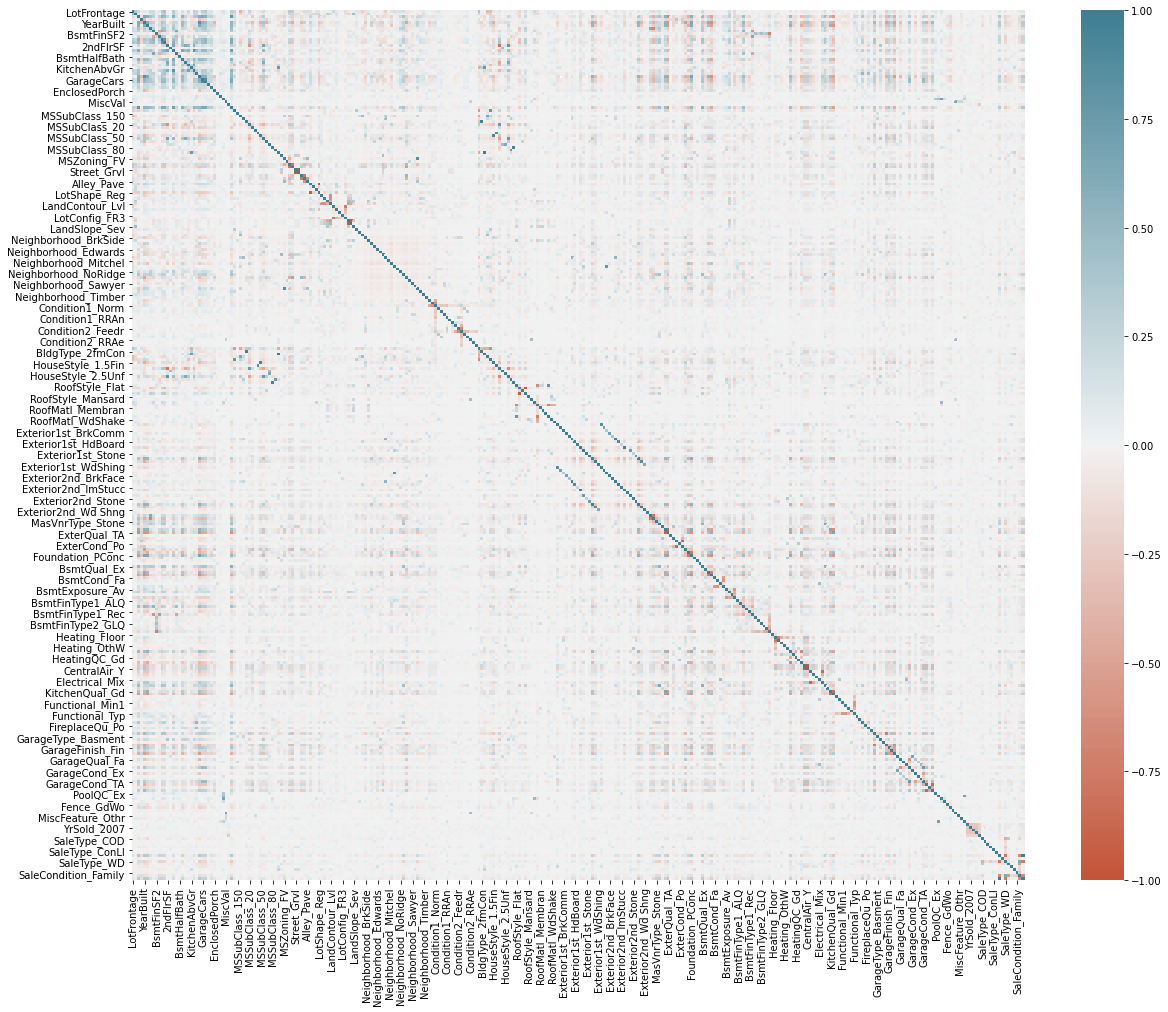

In [237]:
corr = data.corr()
plt.figure(figsize=(20,16))
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=400))

In [259]:
corrs = [(col, abs(data[~data.SalePrice.isna()].SalePrice.corr(data[~data.SalePrice.isna()][col]))) for col in data.columns[:-1] if data[col].dtype in ['int64','float64','bool']]
corrs.sort(key= lambda x:x[1], reverse=True)

corrs = dict(corrs)
corrs

{'SalePrice': 1.0,
 'OverallQual': 0.7909816005838048,
 'GrLivArea': 0.7086244776126522,
 'GarageCars': 0.6404091972583531,
 'GarageArea': 0.6234314389183617,
 'TotalBsmtSF': 0.6135805515591956,
 '1stFlrSF': 0.6058521846919147,
 'FullBath': 0.5606637627484456,
 'TotRmsAbvGrd': 0.5337231555820284,
 'YearBuilt': 0.5228973328794969,
 'YearRemodAdd': 0.5071009671113864,
 'GarageYrBlt': 0.4863616774878608,
 'MasVnrArea': 0.47261449900457436,
 'Fireplaces': 0.46692883675152763,
 'BsmtFinSF1': 0.38641980624215316,
 'LotFrontage': 0.33131854425847873,
 'WoodDeckSF': 0.3244134445681295,
 '2ndFlrSF': 0.3193338028320677,
 'OpenPorchSF': 0.31585622711605543,
 'HalfBath': 0.2841076755947829,
 'LotArea': 0.26384335387140573,
 'BsmtFullBath': 0.22712223313149404,
 'BsmtUnfSF': 0.21447910554696895,
 'BedroomAbvGr': 0.16821315430073996,
 'KitchenAbvGr': 0.1359073708421411,
 'EnclosedPorch': 0.1285779579259565,
 'ScreenPorch': 0.1114465711429111,
 'PoolArea': 0.09240354949187317,
 'OverallCond': 0.07785

In [270]:
data_train_clean = data[~data.SalePrice.isna()]

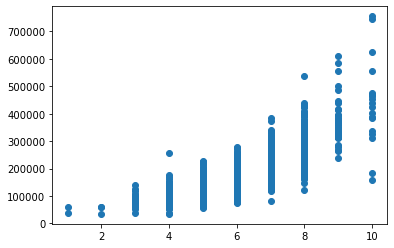

In [262]:
plt.scatter(data_train_clean.OverallQual, data_train_clean.SalePrice)

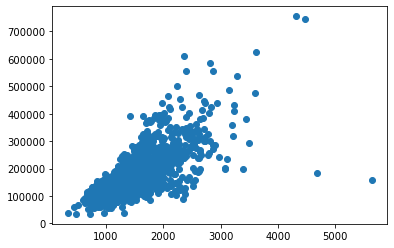

In [263]:
plt.scatter(data_train_clean.GrLivArea, data_train_clean.SalePrice)

In [267]:
data_train_clean[(data_train_clean.GrLivArea>4000) & (data_train_clean.SalePrice<300000)]

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
524,130.0,40094,10,5,2007,2008,762.0,2260.0,0.0,878.0,...,0,1,0,0,0,0,0,0,0,1
1299,313.0,63887,10,5,2008,2008,796.0,5644.0,0.0,466.0,...,0,1,0,0,0,0,0,0,0,1


In [268]:
data = data.drop([524,1299])
data_train_clean = data[~data.SalePrice.isna()]

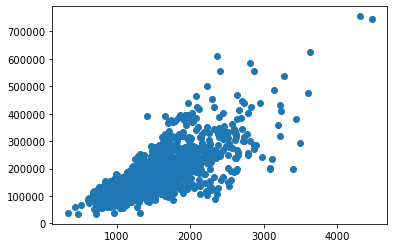

In [271]:
plt.scatter(data_train_clean.GrLivArea, data_train_clean.SalePrice)

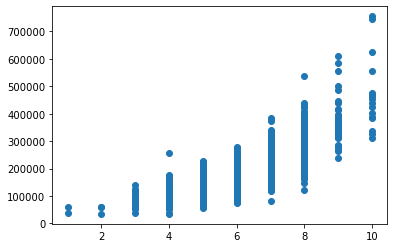

In [273]:
plt.scatter(data_train_clean.OverallQual, data_train_clean.SalePrice)

#### prepare data for xgboost model

In [289]:
#check that all data points are of numeric types
data.dtypes.value_counts()

uint8      272
int64       23
float64     12
dtype: int64

In [290]:
y_train = data[~data.SalePrice.isna()]['SalePrice'].copy()
len(y_train)== len(data_train)

False

In [291]:
x_test = data[data.SalePrice.isna()]
x_train = data[~data.SalePrice.isna()]
len(x_test) == len(data_test), len(x_train) == len(data_train)


(True, False)

In [292]:
del x_train['SalePrice']
del x_test['SalePrice']

In [293]:
y_train.shape, x_train.shape, x_test.shape

((1458,), (1458, 306), (1459, 306))

In [294]:
from sklearn.model_selection import train_test_split

In [295]:
x_train, x_cv, y_train, y_cv = train_test_split(x_train, y_train, test_size=0.35,random_state =57)


In [296]:
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error as mse

In [297]:
DM_train = xgb.DMatrix(x_train.values, label=y_train)
DM_cv = xgb.DMatrix(x_cv, label=y_cv)

In [298]:
model_xgb = XGBRegressor(learning_rate=.03, n_estimators = 30000, max_depth = 2)

model_xgb.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.03, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=30000, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [299]:
pred_cv=model_xgb.predict(x_cv)
pred_train = model_xgb.predict(x_train)

rmse_train = np.sqrt(mse(pred_train, y_train))
rmse_cv = np.sqrt(mse(pred_cv, y_cv))

In [300]:
rmses.append((rmse_train, rmse_cv))

print(rmses)

[(6442.601552412794, 29898.42983599537), (1.2037702378608781, 32420.897235517823), (34.5018421168965, 30903.760048021966), (40.06785318035115, 30873.37158922885), (4738.01928140834, 30402.886635421797), (2894.449949301771, 31362.35584291857), (2844.198477517944, 26239.381879744124), (7.790203286891832, 22510.10525494061), (365.70566982678656, 22475.75446761173)]
